In [4]:
#Importing our libraries
import os
import requests
import pandas as pd
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import panel as pn
pn.extension('plotly')
import plotly.express as px
from MCForecastTools import MCSimulation

%matplotlib inline

ModuleNotFoundError: No module named 'alpaca_trade_api'

In [5]:
start = dt.datetime(2018,1,1)
end =dt.datetime.now()

## Showing RAW Data - Bitcoin, Ethereum, Solana, Polygon, Cosmos

In [15]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Bitcoin
bitcoin = web.DataReader('BTC-USD', 'yahoo', start, end)
bitcoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,14112.200195,13154.700195,14112.200195,13657.200195,10291200000,13657.200195
2018-01-02,15444.599609,13163.599609,13625.000000,14982.099609,16846600192,14982.099609
2018-01-03,15572.799805,14844.500000,14978.200195,15201.000000,16871900160,15201.000000
2018-01-04,15739.700195,14522.200195,15270.700195,15599.200195,21783199744,15599.200195
2018-01-05,17705.199219,15202.799805,15477.200195,17429.500000,23840899072,17429.500000
...,...,...,...,...,...,...
2022-01-19,42478.304688,41242.914062,42374.039062,41744.328125,23091543258,41744.328125
2022-01-20,43413.023438,40672.824219,41744.027344,40680.417969,20382033940,40680.417969
2022-01-21,41060.527344,35791.425781,40699.605469,36457.316406,43011992031,36457.316406


In [16]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Ethereum
ethereum = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,782.530029,742.004028,755.757019,772.640991,2595760128,772.640991
2018-01-02,914.830017,772.346008,772.346008,884.443970,5783349760,884.443970
2018-01-03,974.471008,868.450989,886.000000,962.719971,5093159936,962.719971
2018-01-04,1045.079956,946.085999,961.713013,980.921997,6502859776,980.921997
2018-01-05,1075.390015,956.325012,975.750000,997.719971,6683149824,997.719971
...,...,...,...,...,...,...
2022-01-19,3171.158447,3055.212402,3163.850342,3095.825928,13187424144,3095.825928
2022-01-20,3265.336914,3000.908203,3095.271729,3001.120117,10645922764,3001.120117
2022-01-21,3029.081055,2496.812988,3002.956787,2557.931641,26796291874,2557.931641


In [17]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Solana
solana = web.DataReader('SOL-USD', 'yahoo', start, end)
solana

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-10,1.313487,0.694187,0.832005,0.951054,87364276,0.951054
2020-04-11,1.049073,0.765020,0.951054,0.776819,43862444,0.776819
2020-04-12,0.956670,0.762426,0.785448,0.882507,38736897,0.882507
2020-04-13,0.891603,0.773976,0.890760,0.777832,18211285,0.777832
2020-04-14,0.796472,0.628169,0.777832,0.661925,16747614,0.661925
...,...,...,...,...,...,...
2022-01-19,142.294083,133.355179,141.546997,135.792389,1444663456,135.792389
2022-01-20,143.617401,127.174042,135.791336,127.205284,984099352,127.205284
2022-01-21,128.432861,107.908997,127.333336,111.966057,3771688473,111.966057


In [18]:
#Using our data source, Pandas-DataReader, to obtain historical daily output for Polygon
polygon = web.DataReader('MATIC-USD', 'yahoo', start, end)
polygon

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-28,0.004545,0.004317,0.004521,0.004421,8408136,0.004421
2019-04-29,0.004492,0.003471,0.004418,0.003471,8267044,0.003471
2019-04-30,0.005078,0.003458,0.003462,0.004478,25072706,0.004478
2019-05-01,0.004673,0.004071,0.004440,0.004374,10567352,0.004374
2019-05-02,0.004700,0.004096,0.004366,0.004198,6714908,0.004198
...,...,...,...,...,...,...
2022-01-19,2.138377,2.021592,2.127974,2.035978,1318686617,2.035978
2022-01-20,2.188748,1.960077,2.035699,1.960373,824202447,1.960373
2022-01-21,2.021772,1.658428,1.961334,1.698990,2195018010,1.698990


In [19]:
#Using our data source, DataReader, to obtain historical daily output for Cosmos
cosmos = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-14,6.639943,6.353963,6.439715,6.526642,7318172,6.526642
2019-03-15,7.715249,6.432468,6.633174,7.504351,6057301,7.504351
2019-03-16,8.305615,6.694531,7.507990,7.383882,3477393,7.383882
2019-03-17,7.357443,4.727895,7.357443,4.776164,2653565,4.776164
2019-03-18,5.229982,4.828242,4.828242,5.110341,2567201,5.110341
...,...,...,...,...,...,...
2022-01-19,38.752899,35.554722,38.315929,37.115276,1134981357,37.115276
2022-01-20,42.009510,37.040508,37.124737,39.058186,1290031111,39.058186
2022-01-21,40.768547,32.482494,39.072628,34.417976,2954828732,34.417976


## Data Cleanup - Obtaining what we need, deleting what we do not. Volume and Closing Price are needed.

In [20]:
#Drop unnecessary columns
bitcoin.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
#Rename columns 
bitcoin = bitcoin.rename(columns={"Adj Close":"Bitcoin"})
bitcoin

,Bitcoin
Date,
2018-01-01,13657.200195
2018-01-02,14982.099609
2018-01-03,15201.000000
2018-01-04,15599.200195
2018-01-05,17429.500000
...,...
2022-01-19,41744.328125
2022-01-20,40680.417969
2022-01-21,36457.316406


In [21]:
bitcoin1 = web.DataReader('BTC-USD', 'yahoo', start, end)
bitcoin1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
bitcoin1 = bitcoin1.rename(columns={"Volume":" BTC Volume"})
bitcoin1

,BTC Volume
Date,
2018-01-01,10291200000
2018-01-02,16846600192
2018-01-03,16871900160
2018-01-04,21783199744
2018-01-05,23840899072
...,...
2022-01-19,23091543258
2022-01-20,20382033940
2022-01-21,43011992031


In [22]:
ethereum = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
ethereum = ethereum.rename(columns={"Adj Close":"Ethereum"})
ethereum

,Ethereum
Date,
2018-01-01,772.640991
2018-01-02,884.443970
2018-01-03,962.719971
2018-01-04,980.921997
2018-01-05,997.719971
...,...
2022-01-19,3095.825928
2022-01-20,3001.120117
2022-01-21,2557.931641


In [23]:
ethereum1 = web.DataReader('ETH-USD', 'yahoo', start, end)
ethereum1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
ethereum1 = ethereum1.rename(columns={"Volume":"ETH Volume"})
ethereum1

,ETH Volume
Date,
2018-01-01,2595760128
2018-01-02,5783349760
2018-01-03,5093159936
2018-01-04,6502859776
2018-01-05,6683149824
...,...
2022-01-19,13187424144
2022-01-20,10645922764
2022-01-21,26796291874


In [24]:
solana = web.DataReader('SOL-USD', 'yahoo', start, end)
solana.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
solana = solana.rename(columns={"Adj Close":"Solana"})
solana

,Solana
Date,
2020-04-10,0.951054
2020-04-11,0.776819
2020-04-12,0.882507
2020-04-13,0.777832
2020-04-14,0.661925
...,...
2022-01-19,135.792389
2022-01-20,127.205284
2022-01-21,111.966057


In [25]:
solana1 = web.DataReader('SOL-USD', 'yahoo', start, end)
solana1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
solana1 = solana1.rename(columns={"Volume":"SOL Volume"})
solana1

,SOL Volume
Date,
2020-04-10,87364276
2020-04-11,43862444
2020-04-12,38736897
2020-04-13,18211285
2020-04-14,16747614
...,...
2022-01-19,1444663456
2022-01-20,984099352
2022-01-21,3771688473


In [26]:
cosmos = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
cosmos = cosmos.rename(columns={"Adj Close":"Cosmos"})
cosmos

,Cosmos
Date,
2019-03-14,6.526642
2019-03-15,7.504351
2019-03-16,7.383882
2019-03-17,4.776164
2019-03-18,5.110341
...,...
2022-01-19,37.115276
2022-01-20,39.058186
2022-01-21,34.417976


In [27]:
cosmos1 = web.DataReader('ATOM-USD', 'yahoo', start, end)
cosmos1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
cosmos1 = cosmos1.rename(columns={"Volume":"ATOM Volume"})
cosmos1

,ATOM Volume
Date,
2019-03-14,7318172
2019-03-15,6057301
2019-03-16,3477393
2019-03-17,2653565
2019-03-18,2567201
...,...
2022-01-19,1134981357
2022-01-20,1290031111
2022-01-21,2954828732


In [28]:
polygon = web.DataReader('MATIC-USD', 'yahoo', start, end)
polygon.drop(columns=['High', 'Low', 'Open', 'Close','Volume'],inplace=True)
polygon = polygon.rename(columns={"Adj Close":"Polygon"})
polygon

,Polygon
Date,
2019-04-28,0.004421
2019-04-29,0.003471
2019-04-30,0.004478
2019-05-01,0.004374
2019-05-02,0.004198
...,...
2022-01-19,2.035978
2022-01-20,1.960373
2022-01-21,1.698990


In [29]:
polygon1 = web.DataReader('MATIC-USD', 'yahoo', start, end)
polygon1.drop(columns=['High', 'Low', 'Open', 'Close','Adj Close'],inplace=True)
polygon1 = polygon1.rename(columns={"Volume":"MATIC Volume"})
polygon1

,MATIC Volume
Date,
2019-04-28,8408136
2019-04-29,8267044
2019-04-30,25072706
2019-05-01,10567352
2019-05-02,6714908
...,...
2022-01-19,1318686617
2022-01-20,824202447
2022-01-21,2195018010


In [30]:
#Combining Price data and converting to percent change. Dropping nulls.
combined_close_df = pd.concat([bitcoin, ethereum, solana, cosmos, polygon], axis='columns', join='inner').pct_change().dropna()
combined_close_df

,Bitcoin,Ethereum,Solana,Cosmos,Polygon
Date,,,,,
2020-04-11,-0.000934,-0.001240,-0.183202,-0.001487,0.012881
2020-04-12,0.016330,0.018496,0.136052,0.012017,0.013210
2020-04-13,-0.018082,-0.030177,-0.118611,-0.030470,-0.027776
2020-04-14,-0.000381,0.008426,-0.149013,0.037750,0.012910
2020-04-15,-0.029276,-0.027345,-0.023075,-0.030297,-0.043664
...,...,...,...,...,...
2022-01-19,-0.014898,-0.021555,-0.040927,-0.031293,-0.043441
2022-01-20,-0.025486,-0.030591,-0.063237,0.052348,-0.037135
2022-01-21,-0.103812,-0.147674,-0.119800,-0.118802,-0.133333


In [31]:
#Combining Volume data and converting to percent change. Dropping nulls.
combined_volume_df= pd.concat([bitcoin1, ethereum1, solana1,cosmos1, polygon1], axis='columns', join='outer').pct_change().dropna()
combined_volume_df

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,MATIC Volume
Date,,,,,
2020-04-11,-0.284272,-0.246141,-0.497936,-0.332518,-0.238687
2020-04-12,0.145329,0.115723,-0.116855,-0.034145,-0.131014
2020-04-13,0.079971,0.088706,-0.529872,0.026039,-0.228244
2020-04-14,-0.116752,-0.105806,-0.080372,0.028916,0.458393
2020-04-15,-0.053418,-0.037451,-0.219275,0.038594,-0.456235
...,...,...,...,...,...
2022-01-19,0.030081,0.012536,-0.003293,-0.190516,-0.106404
2022-01-20,-0.117338,-0.192722,-0.318804,0.136610,-0.374982
2022-01-21,1.110289,1.517047,2.832630,1.290510,1.663202


<AxesSubplot:xlabel='Date'>

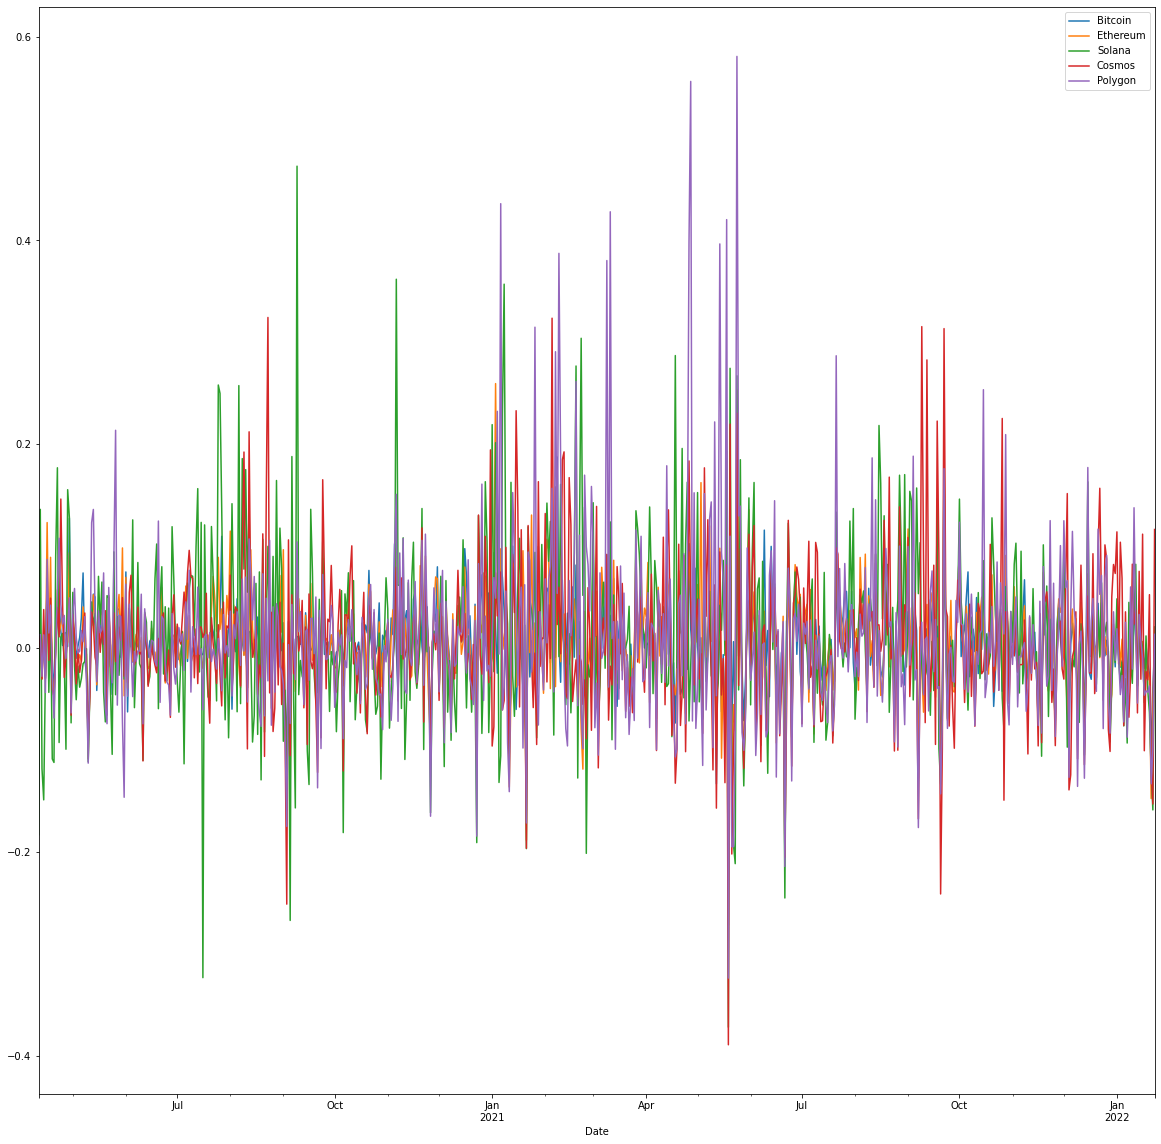

In [32]:
#Plotting percent change to show volatity of price
combined_close_df.plot(figsize=(20,20))

<AxesSubplot:xlabel='Date'>

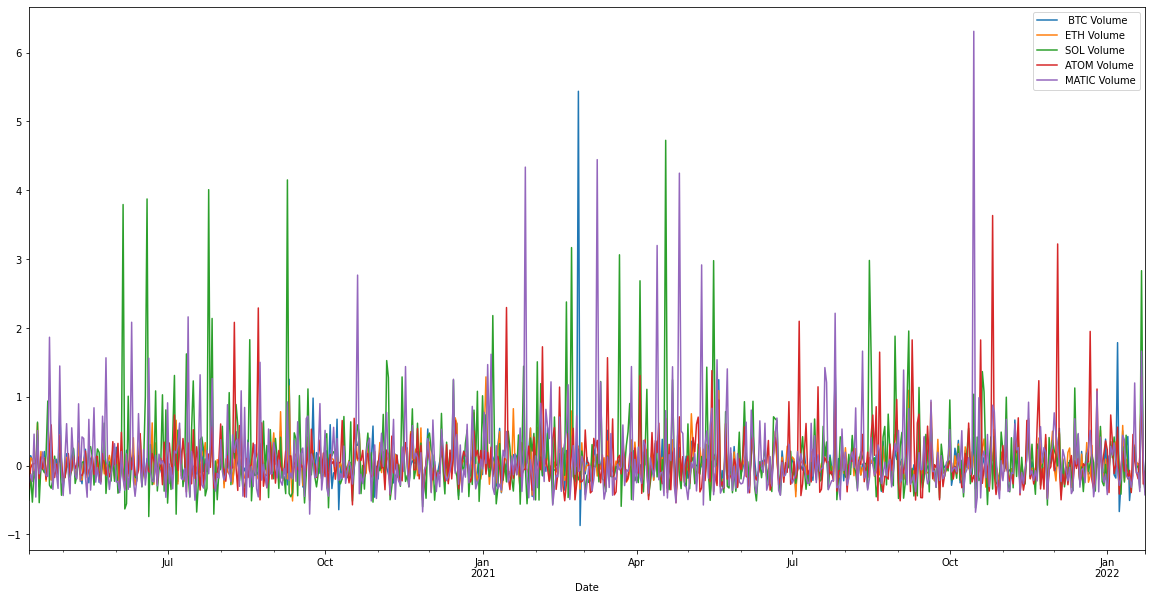

In [33]:
#Plotting percent change to show volatity of volume
combined_volume_df.plot(figsize=(20,10))

In [34]:
combined_close_df.std().dropna()
combined_close_df.tail(10)

,Bitcoin,Ethereum,Solana,Cosmos,Polygon
Date,,,,,
2022-01-14,0.011930,0.018999,0.001020,0.075227,0.032877
2022-01-15,0.001803,0.006202,0.011235,-0.030603,0.006830
2022-01-16,-0.001471,0.006122,0.000374,0.111723,-0.010142
2022-01-17,-0.020024,-0.041367,-0.053637,-0.100821,-0.046292
2022-01-18,0.002960,-0.015030,0.011872,-0.022823,-0.042094
2022-01-19,-0.014898,-0.021555,-0.040927,-0.031293,-0.043441
2022-01-20,-0.025486,-0.030591,-0.063237,0.052348,-0.037135
2022-01-21,-0.103812,-0.147674,-0.119800,-0.118802,-0.133333
2022-01-22,-0.039143,-0.059716,-0.158867,-0.153048,-0.099098


In [35]:
combined_close_df.describe()

,Bitcoin,Ethereum,Solana,Cosmos,Polygon
count,653.000000,653.000000,653.000000,653.000000,653.000000
mean,0.003182,0.005417,0.010767,0.006783,0.010953
std,0.037023,0.049615,0.086728,0.074190,0.087388
min,-0.137661,-0.272003,-0.372088,-0.389349,-0.323903
25%,-0.014898,-0.020078,-0.038647,-0.031454,-0.036265
50%,0.002478,0.005707,0.002241,0.001942,0.003300
75%,0.021169,0.032534,0.051997,0.040198,0.038462
max,0.187465,0.259475,0.472828,0.324360,0.580522


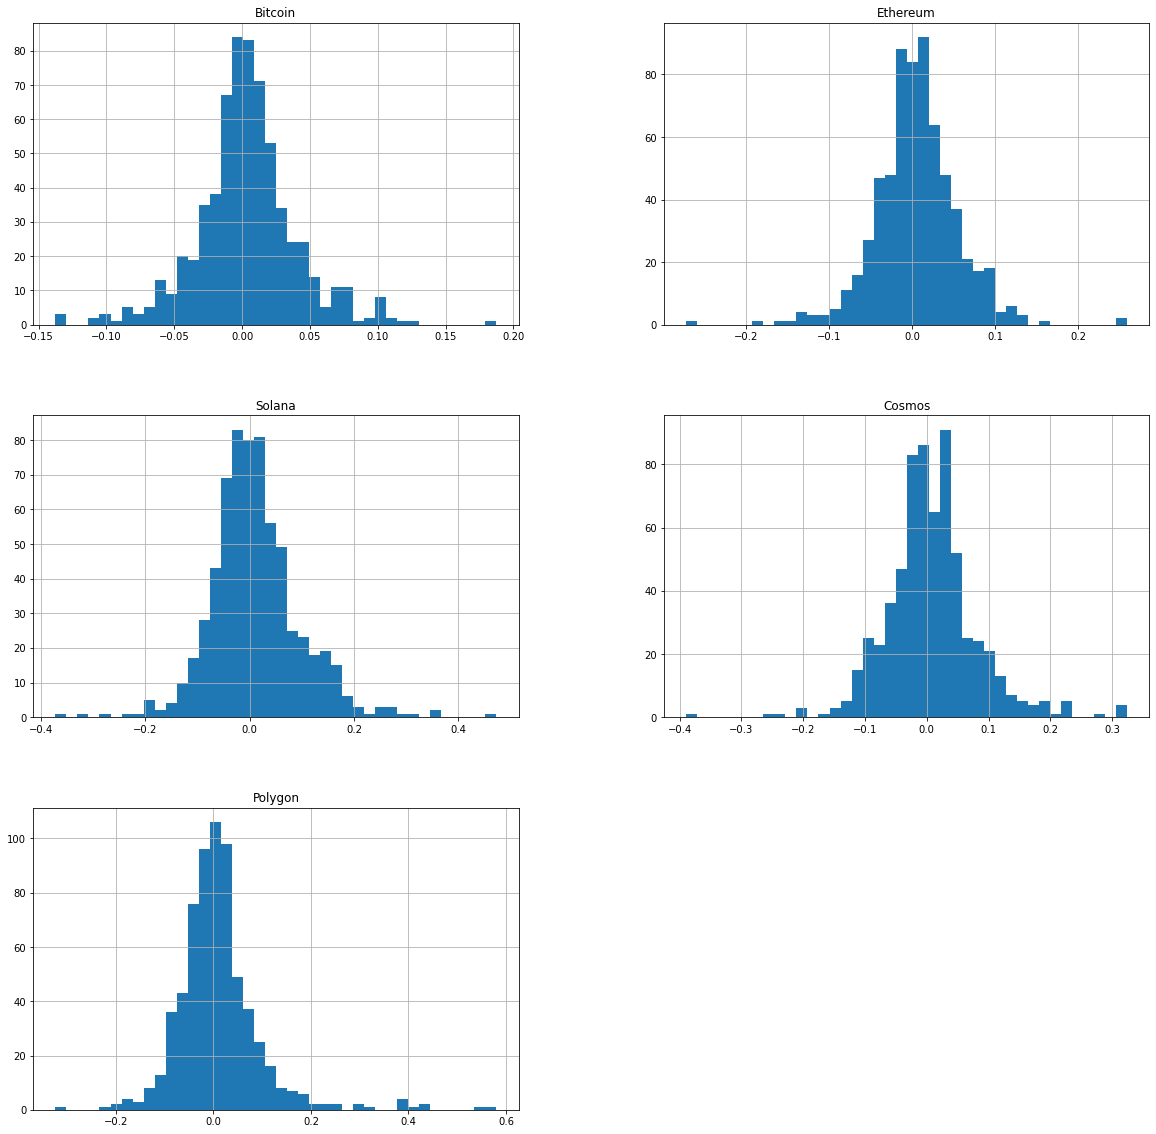

In [36]:
combined_close_df.hist(figsize=(20,20),bins=40);

In [37]:
combined_volume_df.std().dropna()
combined_volume_df.tail(10)

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,MATIC Volume
Date,,,,,
2022-01-14,-0.505623,-0.113211,-0.162930,-0.069572,-0.163997
2022-01-15,-0.220807,-0.290715,-0.383604,-0.391217,-0.315891
2022-01-16,-0.025543,-0.011857,0.044142,0.453046,-0.145762
2022-01-17,0.211640,0.298590,0.268505,0.075455,1.201424
2022-01-18,0.033484,0.055074,-0.025768,-0.092709,-0.106817
2022-01-19,0.030081,0.012536,-0.003293,-0.190516,-0.106404
2022-01-20,-0.117338,-0.192722,-0.318804,0.136610,-0.374982
2022-01-21,1.110289,1.517047,2.832630,1.290510,1.663202
2022-01-22,-0.076667,0.021398,0.070997,-0.267006,0.105957


In [38]:
combined_volume_df.describe()

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,MATIC Volume
count,653.000000,653.000000,653.000000,653.000000,653.000000
mean,0.032649,0.026285,0.118906,0.062745,0.109382
std,0.326904,0.248476,0.636182,0.425371,0.619644
min,-0.869188,-0.512922,-0.739352,-0.569453,-0.703844
25%,-0.124637,-0.136163,-0.223800,-0.172557,-0.230063
50%,-0.005294,-0.011857,-0.019616,-0.011062,-0.043573
75%,0.134002,0.127551,0.255823,0.173900,0.259337
max,5.439003,1.517047,4.726495,3.633905,6.310078


array([[<AxesSubplot:title={'center':' BTC Volume'}>,
        <AxesSubplot:title={'center':'ETH Volume'}>],
       [<AxesSubplot:title={'center':'SOL Volume'}>,
        <AxesSubplot:title={'center':'ATOM Volume'}>],
       [<AxesSubplot:title={'center':'MATIC Volume'}>, <AxesSubplot:>]],
      dtype=object)

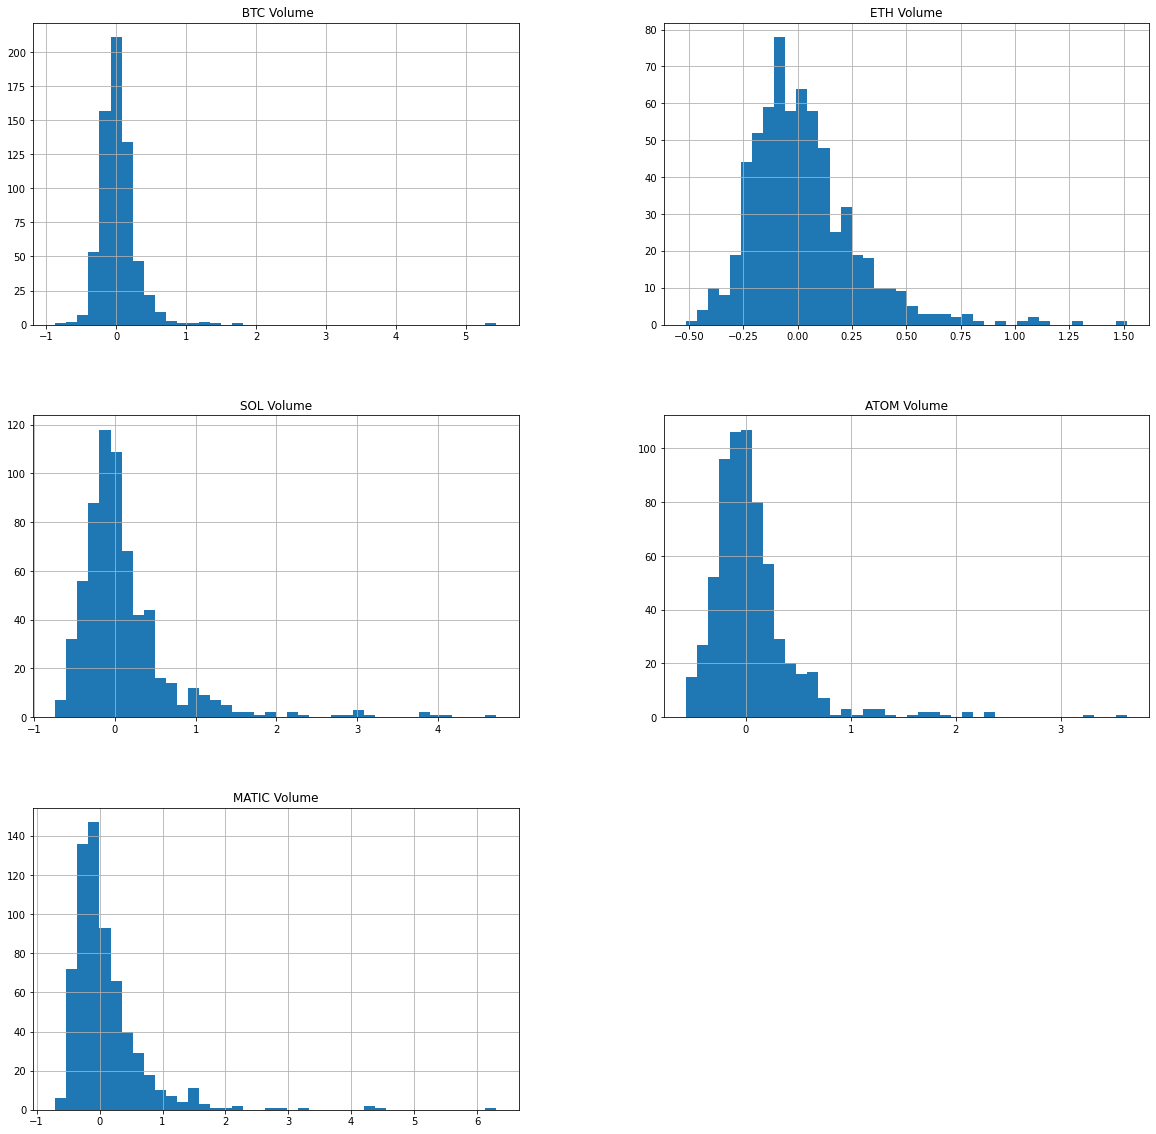

In [39]:
combined_volume_df.hist(figsize=(20,20),bins=40)

In [44]:
#HVPlot shows volality of price and volume
combined_close_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [45]:
combined_volume_df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

<AxesSubplot:>

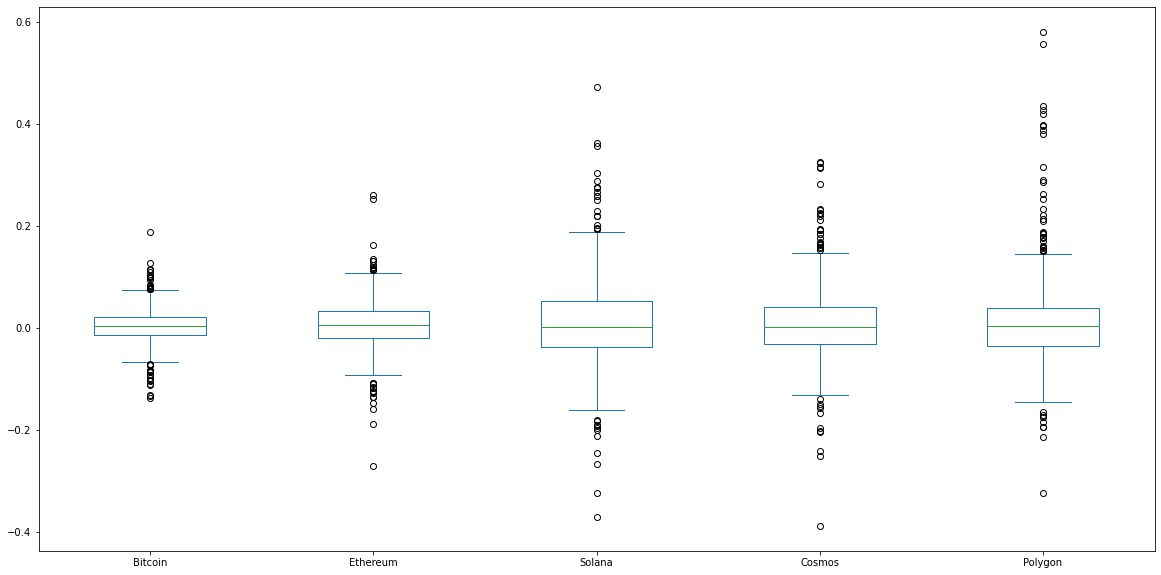

In [46]:
combined_close_df.plot.box(figsize=(20,10))

<AxesSubplot:>

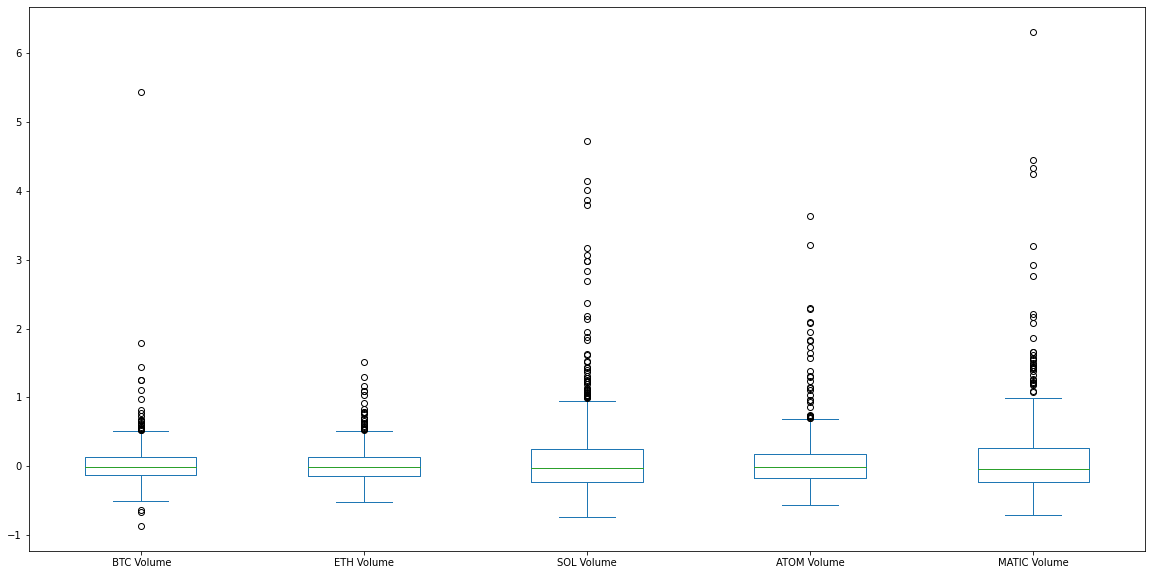

In [47]:
combined_volume_df.plot.box(figsize=(20,10))

In [48]:
combined_close_df.corr()

,Bitcoin,Ethereum,Solana,Cosmos,Polygon
Bitcoin,1.000000,0.757870,0.348404,0.483843,0.497742
Ethereum,0.757870,1.000000,0.483831,0.568825,0.570807
Solana,0.348404,0.483831,1.000000,0.383029,0.381911
Cosmos,0.483843,0.568825,0.383029,1.000000,0.486412
Polygon,0.497742,0.570807,0.381911,0.486412,1.000000


<AxesSubplot:>

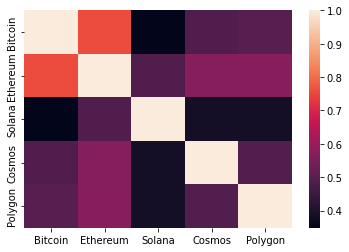

In [49]:
sns.heatmap(combined_close_df.corr())

In [50]:
combined_volume_df.corr()

,BTC Volume,ETH Volume,SOL Volume,ATOM Volume,MATIC Volume
BTC Volume,1.000000,0.602659,0.211094,0.258792,0.214114
ETH Volume,0.602659,1.000000,0.337502,0.284546,0.269634
SOL Volume,0.211094,0.337502,1.000000,0.125890,0.150099
ATOM Volume,0.258792,0.284546,0.125890,1.000000,0.163828
MATIC Volume,0.214114,0.269634,0.150099,0.163828,1.000000


<AxesSubplot:>

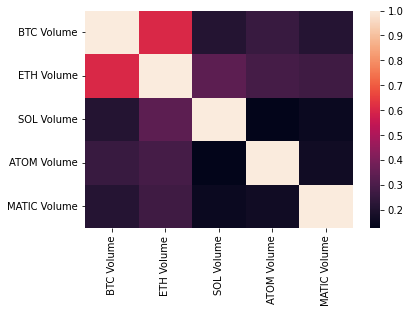

In [51]:
sns.heatmap(combined_volume_df.corr())

In [2]:
#Monte Carlo Simulation is to be run on raw data set


In [ ]:
# S&P500 csv vs our coin portfolio for correlation